# menna allah mohamed abd el samiea

# description:
    I was supposed to make a model to classify whether the x-ray of this lung is normal or suffers from pneumonia.
    But I pressed for the lack of time. I am very sorry

In [1]:
import pandas as pd
import numpy as np
# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale= 2)

import re
import string
import os
import glob
from tqdm import tqdm
from time import time

from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report

#!pip install torch

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset , Dataset
from torchvision import transforms, datasets, models
from PIL import Image, ImageOps
from torchvision.models import resnet18, resnet34
from torch.optim import Adam

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


In [2]:
if torch.cuda.is_available():
    print(f"GPU:{torch.cuda.get_device_name()}")
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    print(DEVICE)

cpu


In [5]:
def remainig_time(tt):
    if tt/60 < 1:
        return "{} sec".format(int(tt))
    if tt/60/60 < 1:
        return "{} min".format(int(tt/60))
    if tt/60/60/24 < 1:
        mins = tt/60
        hrs = mins/60
        return "{:.2f} hrs".format(hrs)
    if tt/60/60/24 > 1:
        days = tt/60/60/24
        return "{:.2f} days".format(days)


def save_model(model, optim, loss_train, loss_val, acc_train, acc_val, epoch, model_name, model_path=''):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optim.state_dict(),
        'loss_train': loss_train,
        'loss_val': loss_val,
        'epoch': epoch,
        'acc_train': acc_train,
        'acc_val': acc_val,
    }, os.path.join(model_path, model_name))


def load_model(model_path, device=DEVICE):
    return torch.load(model_path, map_location=device)

In [6]:
# Hyper Parameters (You can change as you like ... and see how it affects the results)
LR = 3e-5
BATCH_SIZE = 32
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_RESIZE = (IMG_HEIGHT, IMG_WIDTH)
EPOCHS = 100
mean=0.5
std=0.5 

# Constants
NUM_WORKERS = 3 # Based on the 
NUM_CLASSES = 2
CLASSES = ['NORMAL', 'PNEUMONIA']
CHANNELS = 1
MIN_ACC = float('-inf')

In [7]:
# Transformation

TR = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Resize(size= IMG_RESIZE),
    transforms.Normalize(.5, std)
])
    # 2- Resize the Image,#
    # 3- Convert Image data into tensor,#
    # 4- Normalize your Image with mean=0.5, std=0.5 #

In [12]:
DATA_PATH = 'C:\\Users\\LENOVO\\chest_xray\\chest_xray'
TRAIN_DATA_PATH = os.path.join(DATA_PATH, 'train/')
VAL_DATA_PATH = os.path.join(DATA_PATH, 'val/')
TEST_DATA_PATH = os.path.join(DATA_PATH, 'test/')

train_normal = glob.glob(TRAIN_DATA_PATH + "NORMAL/*")
train_pneumonia = glob.glob(TRAIN_DATA_PATH + "PNEUMONIA/*")

test_normal = glob.glob(TEST_DATA_PATH + "NORMAL/*")
test_pneumonia = glob.glob(TEST_DATA_PATH + "PNEUMONIA/*")


val_normal = glob.glob(VAL_DATA_PATH + "NORMAL/*")
val_pneumonia = glob.glob(VAL_DATA_PATH + "PNEUMONIA/*")

train = datasets.ImageFolder(root = TRAIN_DATA_PATH , transform = TR )
val = datasets.ImageFolder(root = VAL_DATA_PATH , transform = TR )
df_test = datasets.ImageFolder(root = TEST_DATA_PATH , transform = TR)

df_train = ConcatDataset([train,val])


%time

Wall time: 0 ns


In [13]:
df_train = pd.DataFrame(df_train.datasets[0].imgs + df_train.datasets[1].imgs ,columns =["path","label"]) 
df_test = pd.DataFrame(df_test.imgs , columns = ["path" , "label"])

In [14]:
print("Images in Training set:" , df_train.shape[0])
print("Images in Testing set: " ,df_test.shape[0])

Images in Training set: 5232
Images in Testing set:  624


In [15]:
df_train.sample(3)

,path,label
585,C:\Users\LENOVO\chest_xray\chest_xray\train/NO...,0
2685,C:\Users\LENOVO\chest_xray\chest_xray\train/PN...,1
96,C:\Users\LENOVO\chest_xray\chest_xray\train/NO...,0


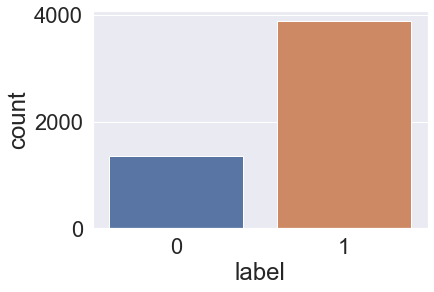

In [16]:
sns.countplot( x = 'label' , data = df_train)

In [17]:
## Apply Weighted Loss w.r.t Size of label
## So class with low number of images get higher weight
## while class with High number of images get lower weight
w = [1345, 3850]
weight = torch.FloatTensor([1 - 1345/sum(w) , 1 - 3850/sum(w)])
criterion = nn.NLLLoss(weight= weight).to(DEVICE)
# Show the Weights (should be close to this ==> [0.74, 0.25])
print(criterion.weight)

tensor([0.7411, 0.2589])


In [19]:
def train_fn(batches, model, optim, scheduler, device=DEVICE):
    model.train() # set the model mode => training
    batch_acc = 0
    ep_loss = 0
    # Loop through the training batches
    for batch in tqdm(batches, total=len(batches), position=0, leave=True):
        
        imgs, labels = # Get Your image and targets from the given batch
        # Forward Propagation
        labels_pred = ## Get Your predictions from model
        # Calculate Loss
        loss = ## Get your loss bet. Predictions and Targets
        # Backward propagation (Check: https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944)
        ## - Zero your optimizer gradients
        ## - Calculate loss gradient
        ## - Make step with optimizer
        ## - Accumulating Loss & Accuracy Across batches
        ep_loss += loss.item()
        batch_acc += sum(labels == labels_pred.argmax(1)).item()
    # Calculate The whole Epoch Accuracy after the batches loop ends
    ep_acc = batch_acc / (BATCH_SIZE * len(batches))
    ## Return the ep_loss and the ep_acc
    return ep_loss, ep_acc
Evaluation method

SyntaxError: invalid syntax (<ipython-input-19-eb094b513877>, line 8)

# thank you